In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt

In [4]:
from tensorflow import keras

In [5]:
# 导入数据集
fashion_mnist = keras.datasets.fashion_mnist

如果这里已经下载了[数据](https://github.com/zalandoresearch/fashion-mnist/blob/master/README.zh-CN.md#%E8%8E%B7%E5%8F%96%E6%95%B0%E6%8D%AE)，可以指定数据路径：
```python
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/fashion')
```

In [6]:
fashion_mnist

<module 'tensorflow._api.v1.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.6/site-packages/tensorflow/_api/v1/keras/datasets/fashion_mnist/__init__.py'>

In [7]:
# 定义训练集和测试集
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
# 定义类别名称
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]

In [9]:
# 校验训练集和测试集数据

In [10]:
assert train_images.shape == (60000, 28, 28)

In [11]:
assert len(train_labels) == 60000

In [12]:
assert test_images.shape == (10000, 28, 28)

In [13]:
assert len(test_labels) == 10000

数据预处理，因为像素值在0-255之间，接下来将这些数据缩小至0-1之间（类似于二值化……？）

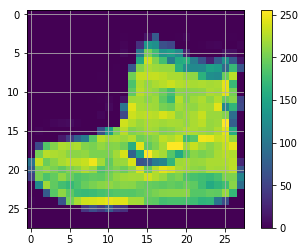

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid()

In [15]:
train_images = train_images / 255.0

In [16]:
test_images = test_images / 255.0

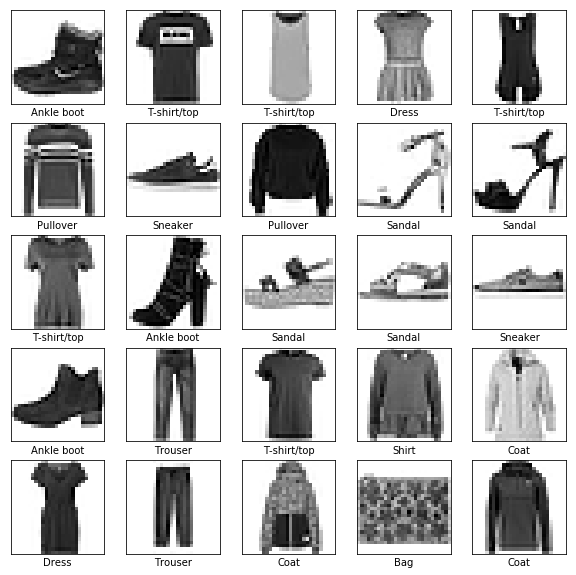

In [17]:
# 显示训练集前25张图片，并显示类别名称
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# 构建模型
## 设置层
神经网络的基本构造块是层。层从传入到其中的数据中提取表示结果。  
该网络的第一层（tf.keras.layers.Flatten）将图片从二维数组格式（`[[28, 28],]`）转为一维数组格式（`[784,]`），可以将该层视为图像中像素未堆叠的行，并排列这些行。该层没有要学习的参数；它只改动数据的格式。  
在完成降维后，这个网络还包含了两层（tf.keras.layers.Dense）。第一个 Dense 层具有 128 个节点（或神经元）。第二个 Dense 层是具有十个节点的softmax层，会返回一个十个概率的分的数组，得分总和为1。

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [19]:
model

# 编译模型
在完成构建模型后，还需要几个步骤才能开始训练：
1. 损失函数（loss） - 衡量模型在训练期间的准确率。我们希望尽可能缩小该函数，以“引导”模型朝着正确的方向优化。
2. 优化器（optimizer） - 根据模型看到的数据及其损失函数更新模型的方式。
3. 指标（metrics） - 用于监控训练和测试步骤。以下示例使用准确率，即图像被正确分类的比例。

In [20]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
训练神经网络模型需要执行以下步骤：
1. 将训练数据传入到模型中，比如 train_images 和 train_labels。
2. 模型学习将图像与标签相关联。
3. 模型对测试集进行预测，测试test_images与test_labels是否一致。

要开始训练，调用 model.fit 方法，使模型与训练数据“拟合”：

In [21]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.5019 - acc: 0.8224
Epoch 2/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3766 - acc: 0.8639
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3377 - acc: 0.8757
Epoch 4/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.3128 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.2972 - acc: 0.8906


In [22]:
# 评估准确率
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 25us/step


In [23]:
print('Test accuracy:', test_acc)
# 5 0.8734
# 10 0.8806
# 100 0.8859

Test accuracy: 0.8683


In [24]:
# 预测
predictions = model.predict(test_images)

In [25]:
predictions[0]

array([5.7561076e-05, 1.8425329e-09, 8.3873158e-07, 4.5093640e-07,
       3.2145031e-06, 3.1152649e-03, 2.4256580e-05, 2.3332001e-01,
       1.7142006e-04, 7.6330698e-01], dtype=float32)

In [26]:
# 预测结果由十个数字组成，这些数字说明了对应了十个分类的置信度。查看最高的置信度。
np.argmax(predictions[0])

9

In [27]:
# 因此可以十分确信这张图是属于class_name[9]，检查是否正确
test_labels[0]

9

In [28]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[
        i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(
        "{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100 * np.max(predictions_array),
                                  class_names[true_label]),
        color=color)

In [29]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

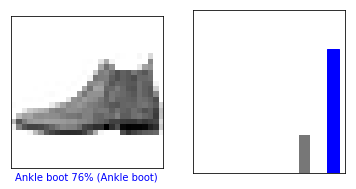

In [30]:
# 正确的预测标签为蓝色，错误的预测标签为红色。
# 数字表示预测标签的百分比（总计为 100）。
# 请注意，即使置信度非常高，也有可能预测错误。
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

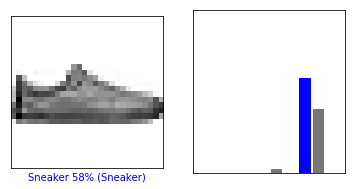

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

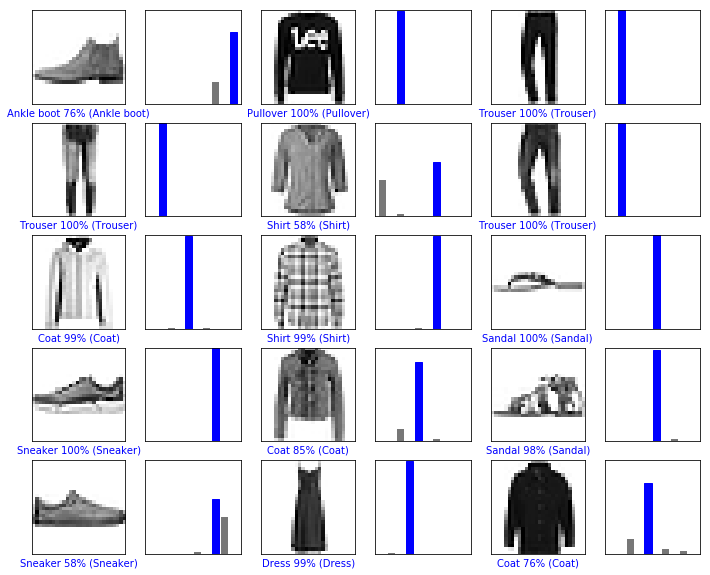

In [32]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [33]:
# 进行预测
img = test_images[0]

In [34]:
img.shape

(28, 28)

In [35]:
img = (np.expand_dims(img, 0))

In [36]:
img.shape

(1, 28, 28)

In [37]:
# 现在进行预测
predictions_single = model.predict(img)

In [38]:
predictions_single

array([[5.7561068e-05, 1.8425257e-09, 8.3873067e-07, 4.5093634e-07,
        3.2144994e-06, 3.1152628e-03, 2.4256577e-05, 2.3332009e-01,
        1.7142003e-04, 7.6330686e-01]], dtype=float32)

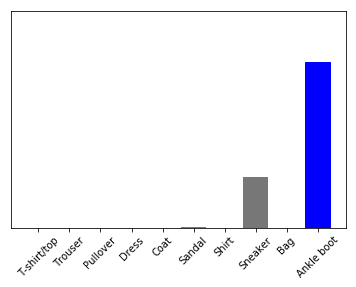

In [39]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [40]:
np.argmax(predictions_single[0])

9